## Importing the Dependencies

In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import warnings
warnings.filterwarnings(action='ignore')

## Defining Utility Functions

In [7]:
def get_clf_eval(y_test, y_pred=None, y_pred_prob=None):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
    return confusion

## Loading the Dataset

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


'DiabetesPedigreeFunction' is a long name, let's change to DPF

In [8]:
df.rename(columns={'DiabetesPedigreeFunction': 'DPF'}, inplace=True)

## EDA

### Dealing with Missing Values

In [10]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [16]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace({0, np.NaN})

In [17]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [18]:
import missingno

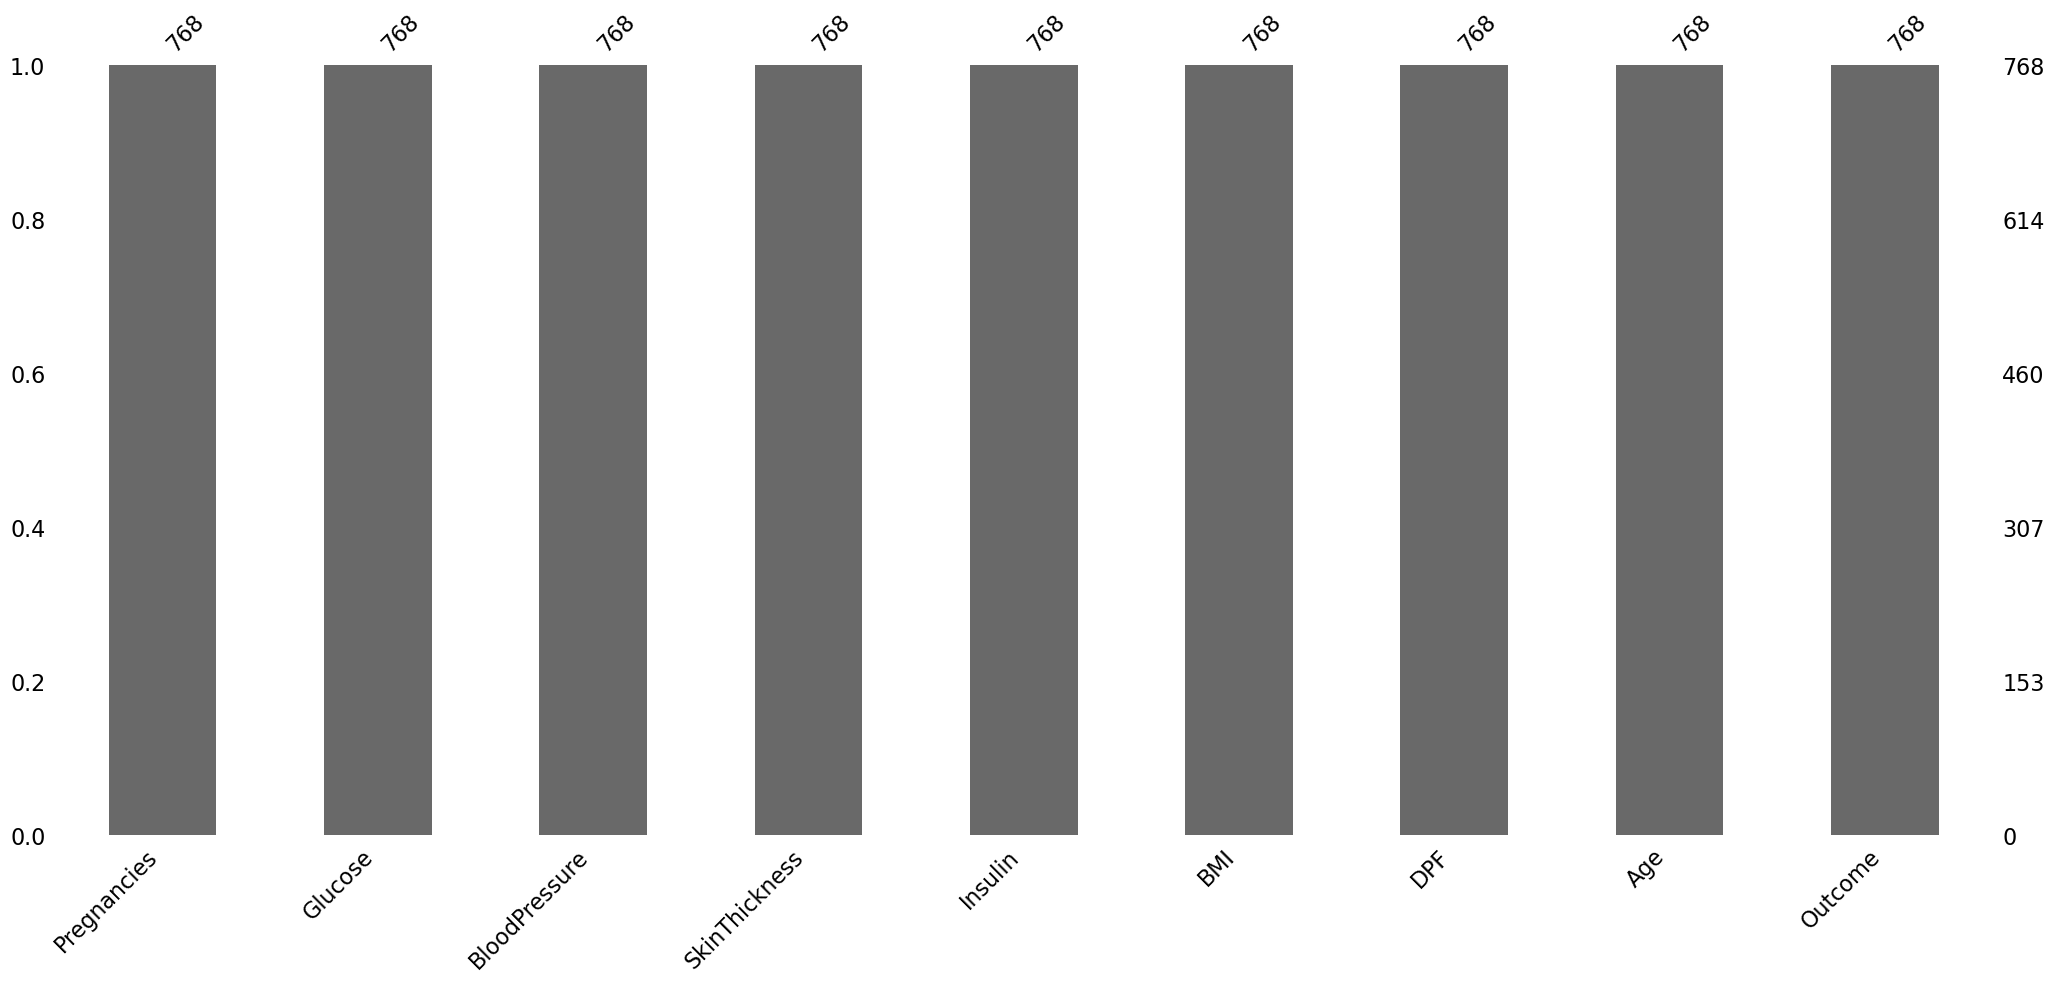

In [19]:
missingno.bar(df)
plt.show()

## Checking Target Imbalance

In [24]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [25]:
value_counts = df['Outcome'].value_counts()

In [21]:
df['Outcome'].value_counts() / len(df) * 100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

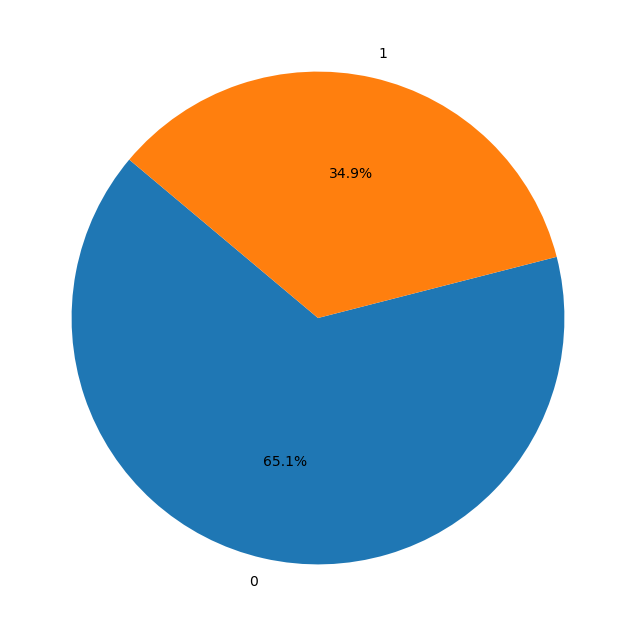

In [27]:
categories = [0, 1]
values = [count for count in value_counts]  

plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140) 

plt.show()

The target is well balanced in this case

## Checking Statistics

In [28]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
df.describe([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
10%,0.000000,85.000000,54.000000,0.000000,0.000000,23.600000,0.165000,22.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
90%,9.000000,167.000000,88.000000,40.000000,210.000000,41.500000,0.878600,51.000000,1.000000
95%,10.000000,181.000000,90.000000,44.000000,293.000000,44.395000,1.132850,58.000000,1.000000


Many features have data points with values 0, they need to be looked into further

## Checking and Removing Outliers

In [32]:
df.loc[:, :'Age'].columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age'],
      dtype='object')

In [33]:
feature_names = [cname for cname in df.loc[:, :'Age'].columns]

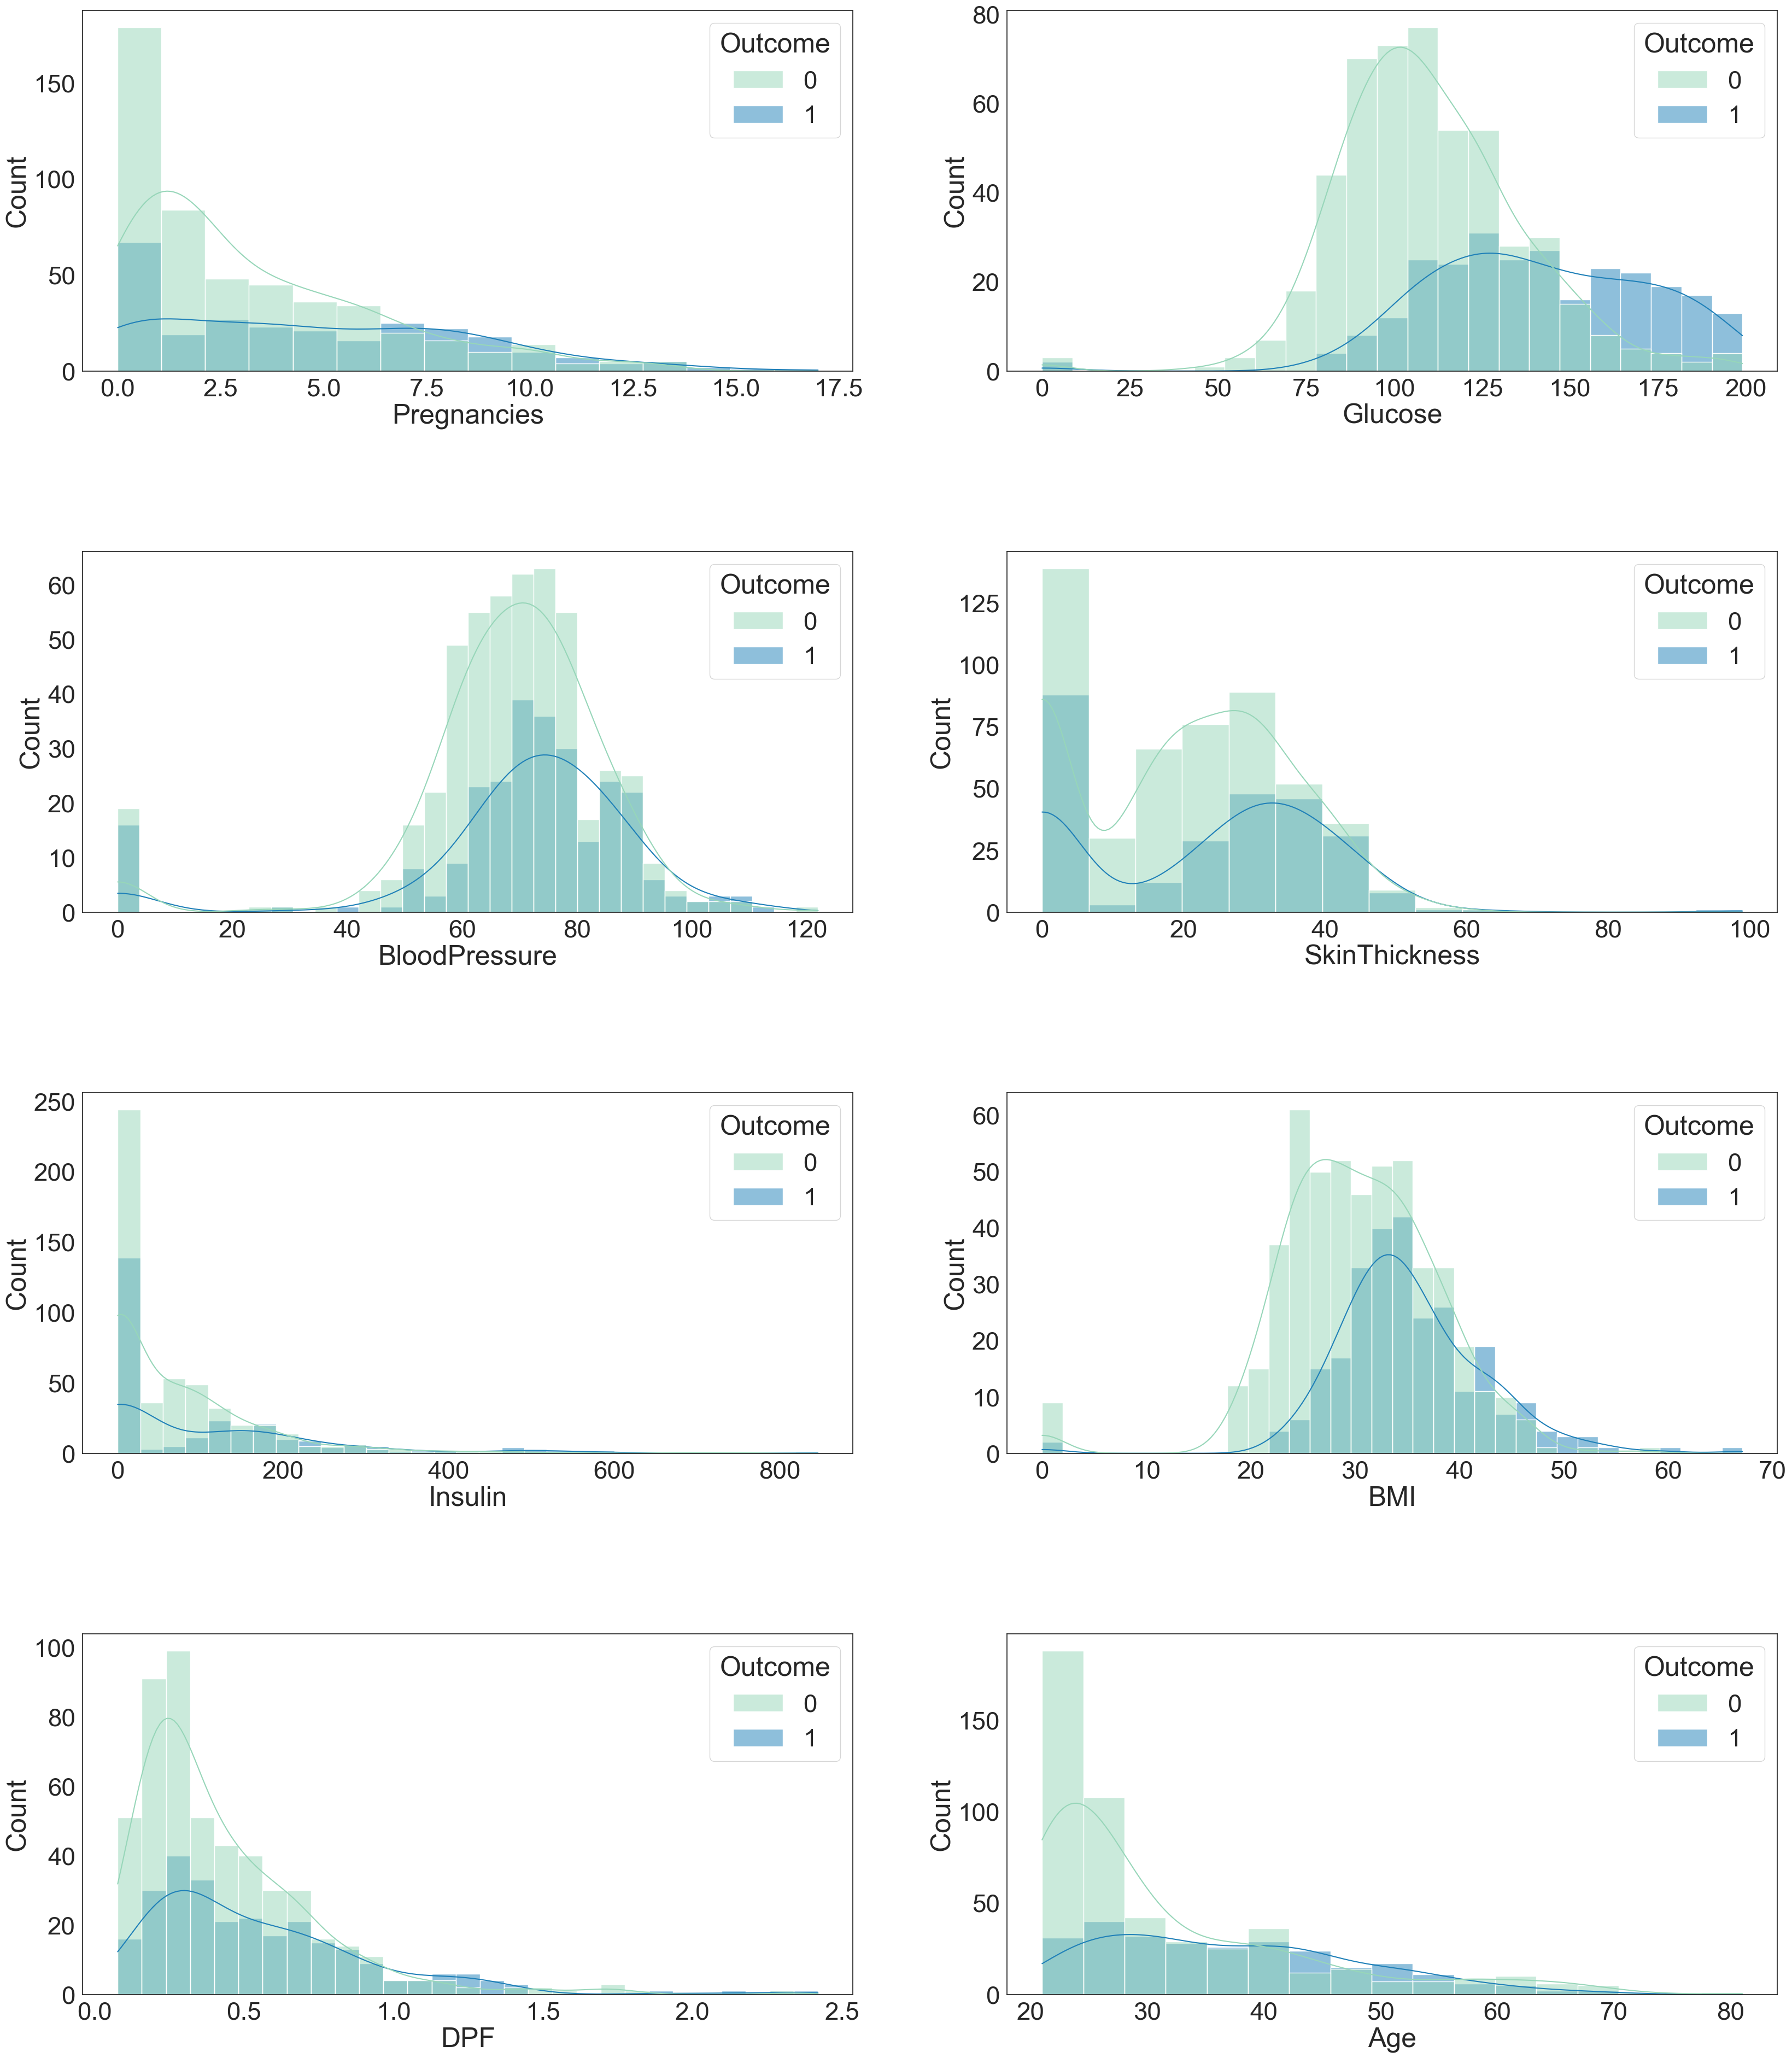

In [38]:
rcParams['figure.figsize'] = 40,60
sns.set(font_scale = 3)
sns.set_style('white')
sns.set_palette('bright')
plt.subplots_adjust(hspace=0.5)
i = 1
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=name, hue='Outcome',kde=True,palette='YlGnBu')
    i += 1

Many features seem to have 0 values. Let's check the proportion of zero values in those features

In [41]:
zero_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for feature in zero_features:
    print('{} has {} 0-values ({:.2f}%)'.format(feature, (df[feature] == 0).sum(), (df[feature] == 0).sum() / len(df) * 100))

Pregnancies has 111 0-values (14.45%)
Glucose has 5 0-values (0.65%)
BloodPressure has 35 0-values (4.56%)
SkinThickness has 227 0-values (29.56%)
Insulin has 374 0-values (48.70%)
BMI has 11 0-values (1.43%)


Insulin and SkinThickness have a significant percentage of 0-values. However, 0 pregnancies does make sense. That can't be said about the other zero_features

In [42]:
zero_features.pop(0)

'Pregnancies'

In [44]:
df[zero_features] = df[zero_features].replace(0, df[zero_features].mean())

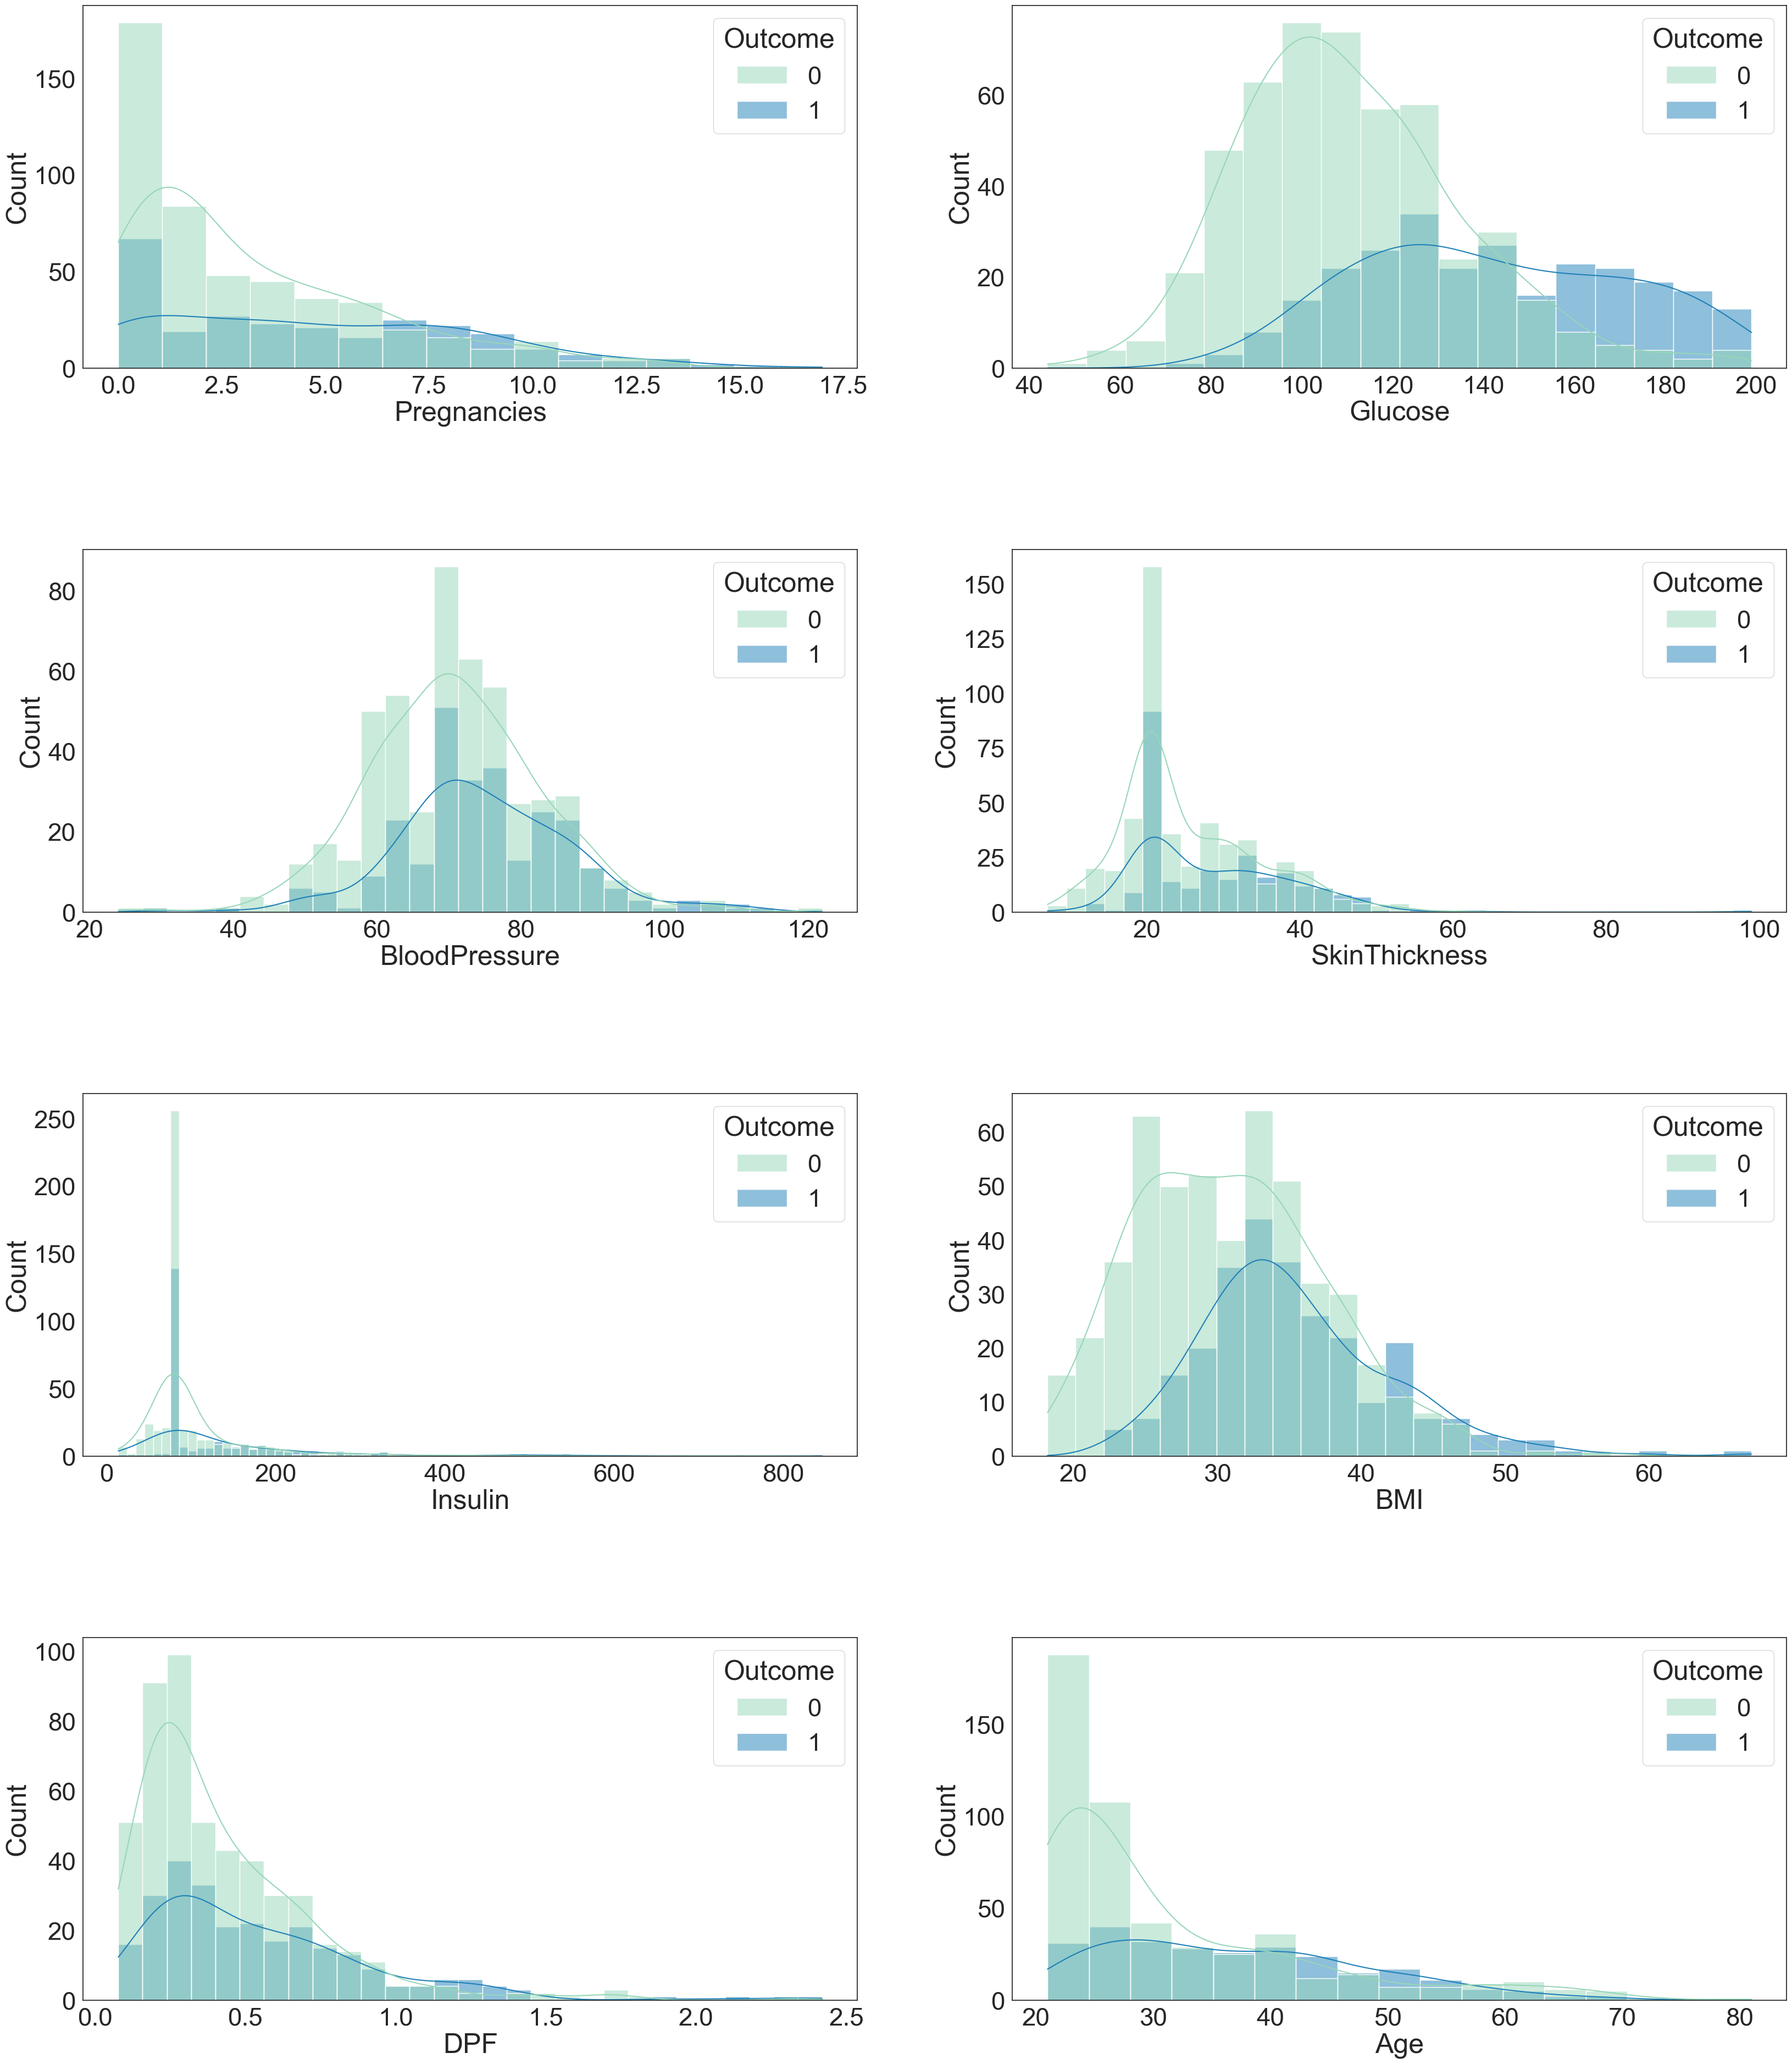

In [45]:
rcParams['figure.figsize'] = 40,60
sns.set(font_scale = 3)
sns.set_style('white')
sns.set_palette('bright')
plt.subplots_adjust(hspace=0.5)
i = 1
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=name, hue='Outcome',kde=True,palette='YlGnBu')
    i += 1

## Splitting the Features and the Label

In [46]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

## Splitting the Dataset into Training Set and Test Set

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

## Feature Scaling

In [51]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.00000,614.000000
mean,3.982085,121.663636,72.576299,26.871098,115.872370,32.366679,0.47785,33.558632
std,3.430694,29.978939,12.313092,9.812096,91.206647,6.772838,0.34200,11.884531
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.07800,21.000000
25%,1.000000,100.000000,65.000000,20.536458,79.799479,27.500000,0.24150,24.000000
50%,3.000000,118.000000,72.000000,23.000000,79.799479,31.996289,0.37450,30.000000
75%,6.000000,139.750000,80.000000,33.000000,122.000000,36.300000,0.61800,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.42000,81.000000


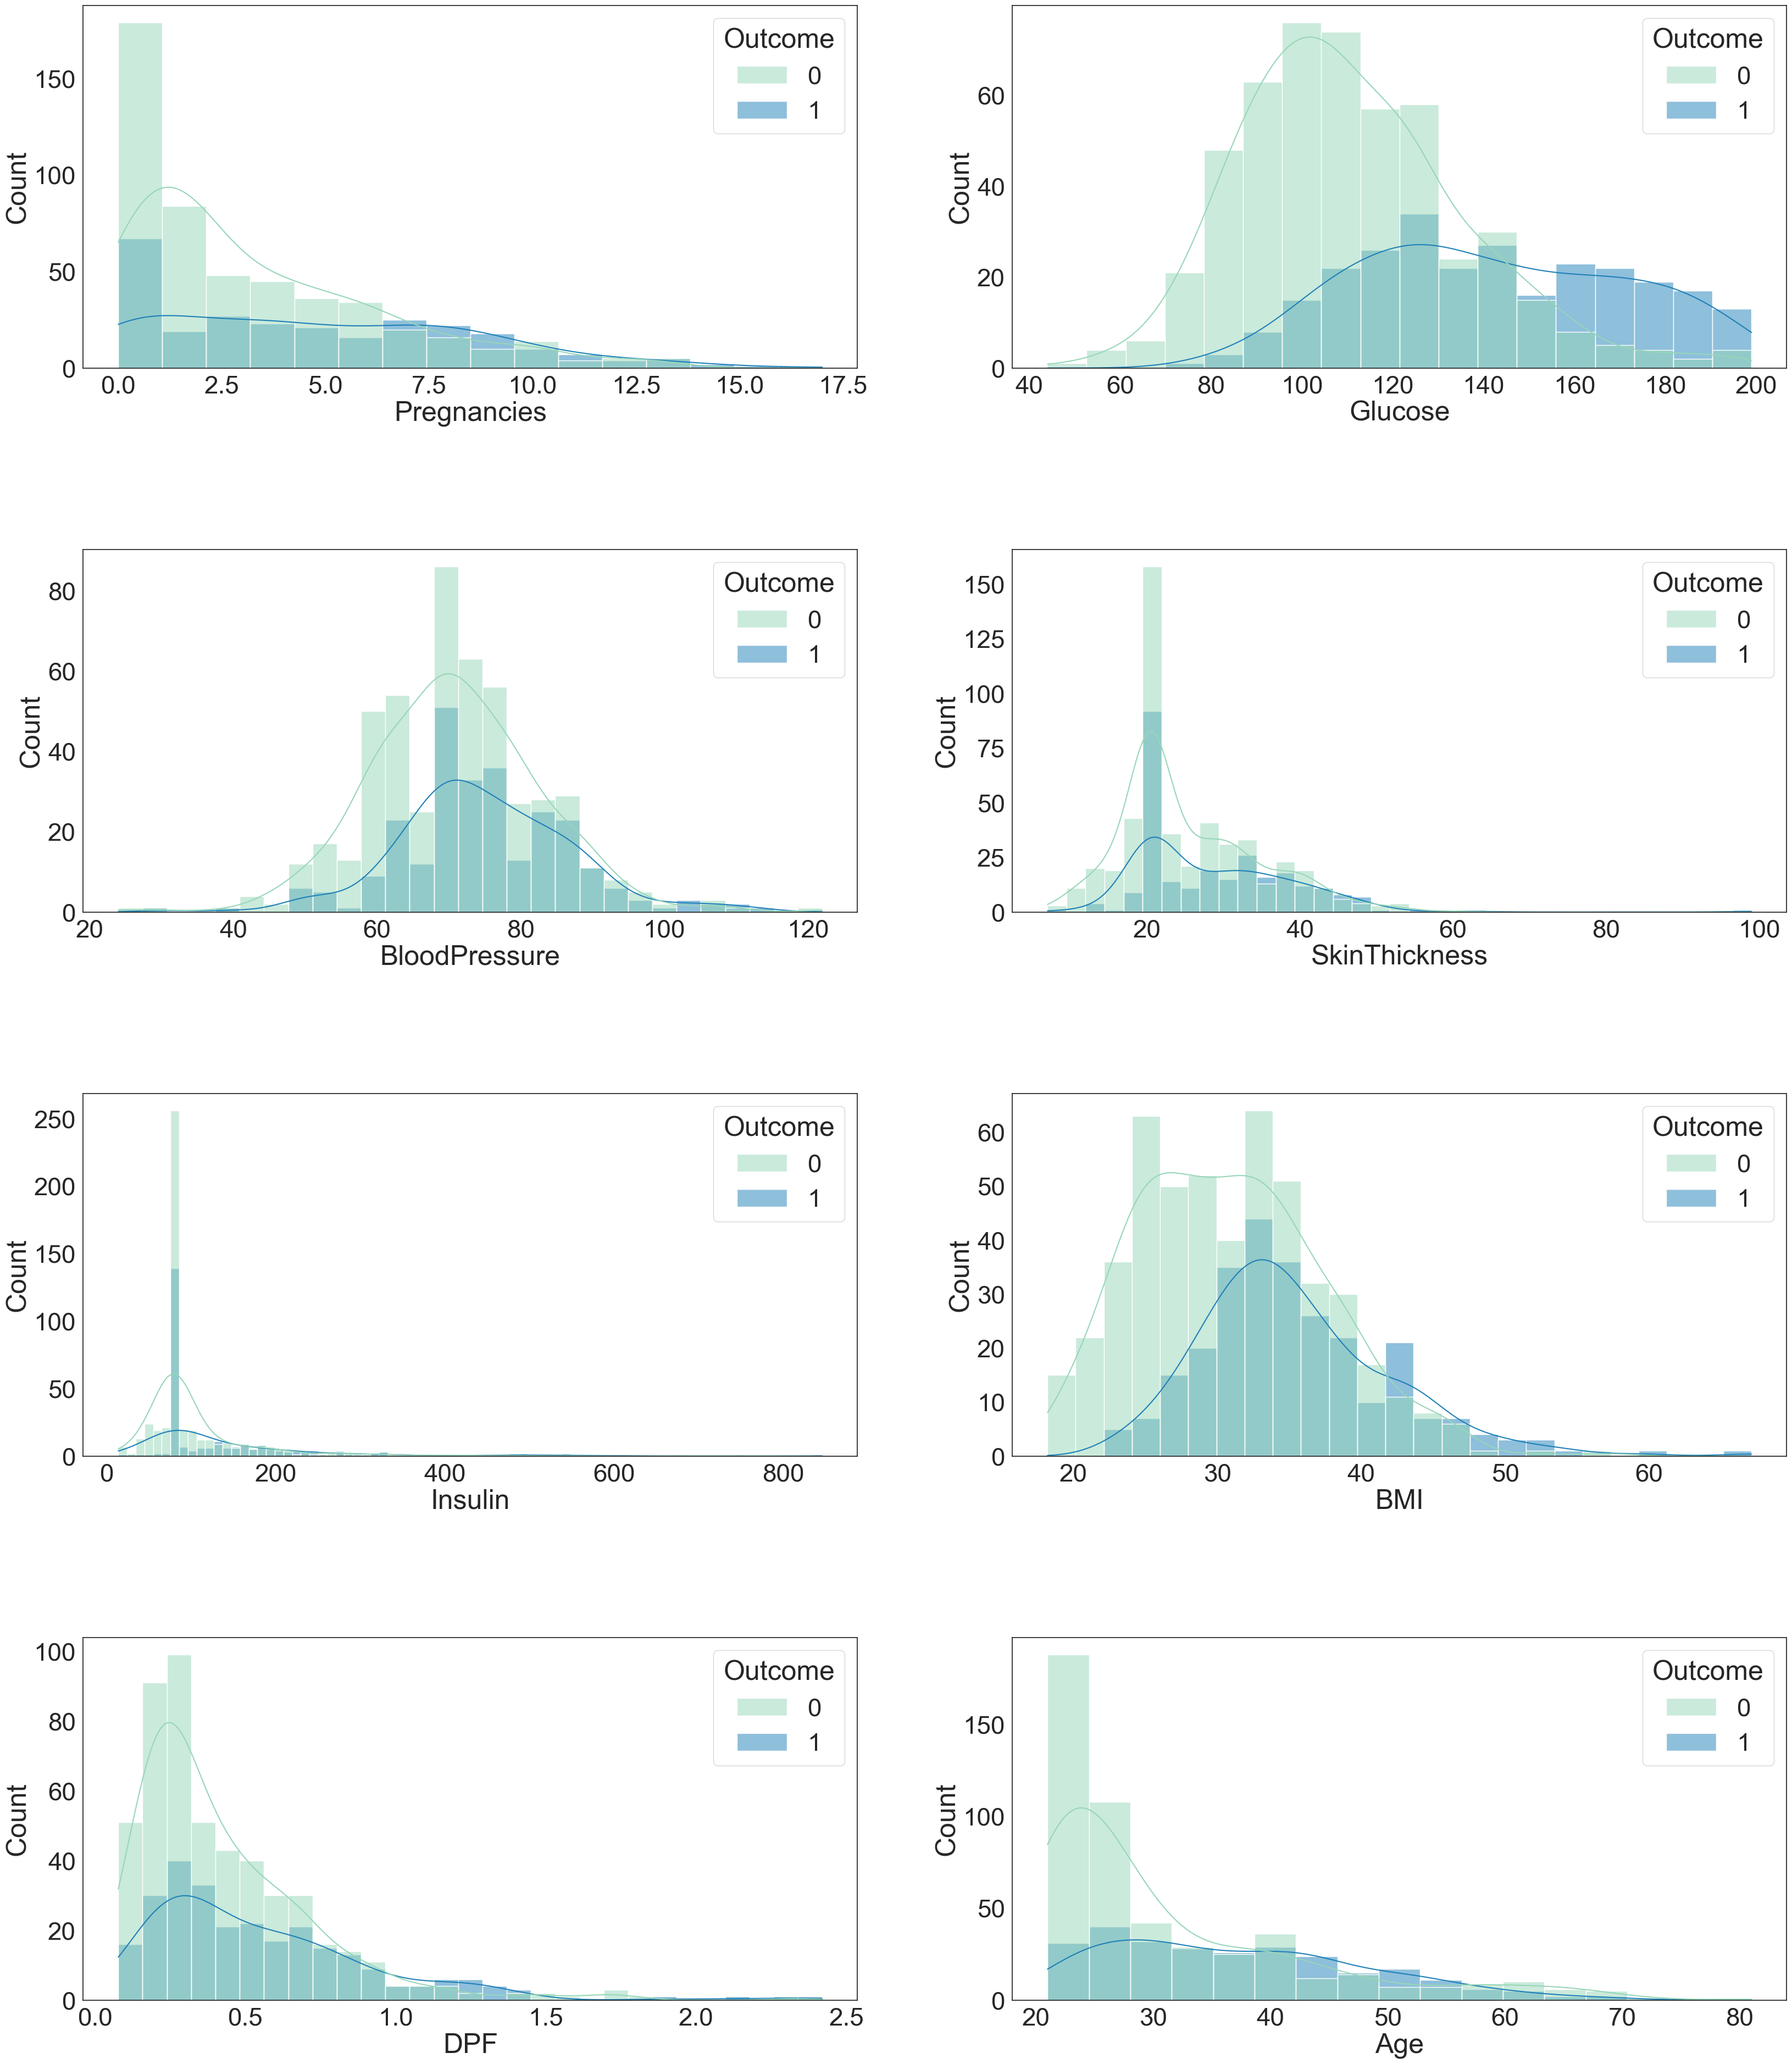

In [54]:
rcParams['figure.figsize'] = 40, 60
sns.set(font_scale=3)
sns.set_style('white')
sns.set_palette('bright')
plt.subplots_adjust(hspace=0.5)
i = 1
for name in feature_names:
    plt.subplot(5, 2, i)
    sns.histplot(data=df, x=name, hue='Outcome', kde=True, palette='YlGnBu')
    i += 1

## Checking Correlation between Features

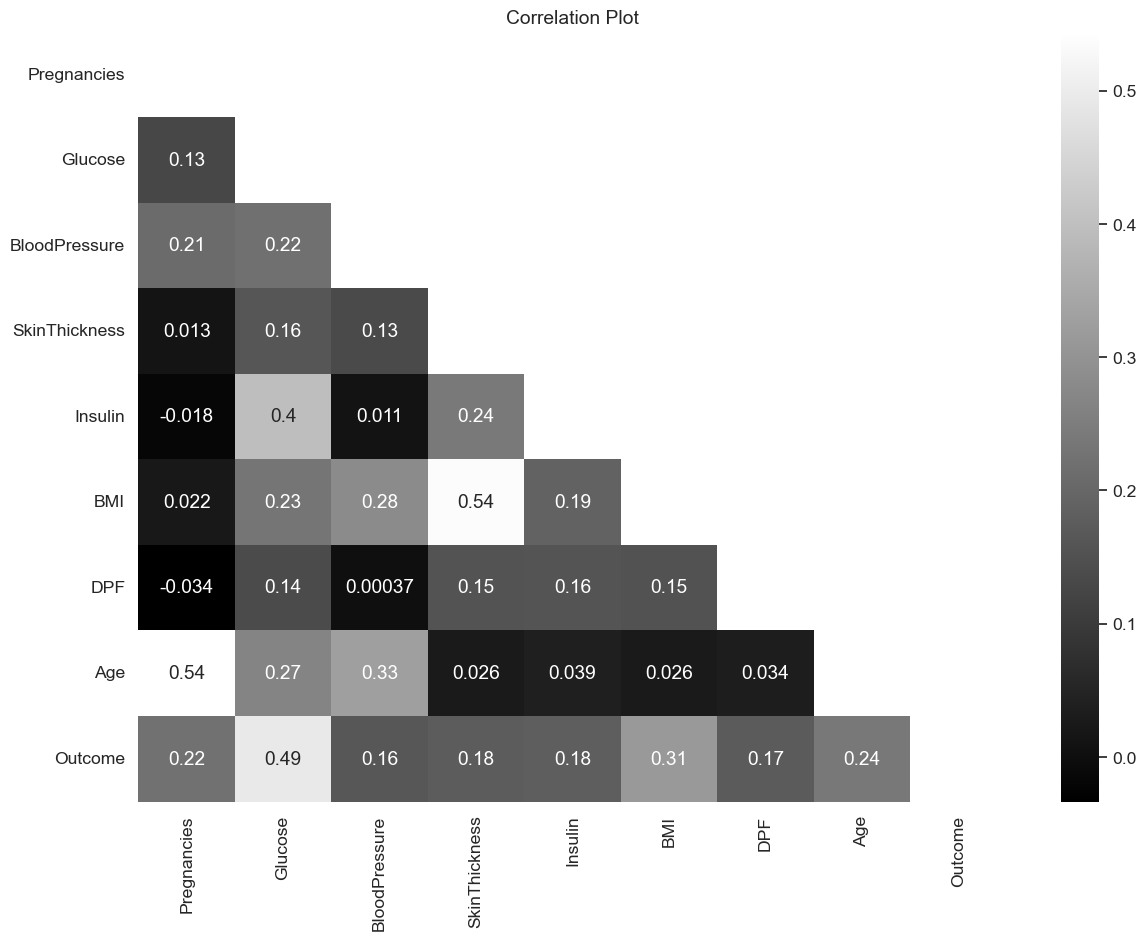

In [62]:
plt.figure(figsize=(14, 10))
sns.set(font_scale=1.15)
sns.set_style('white')
sns.set_palette('bright')
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(),annot=True,cmap='gist_yarg_r', mask=mask, cbar=True)
plt.title('Correlation Plot')
plt.show()

<Figure size 1200x1200 with 0 Axes>

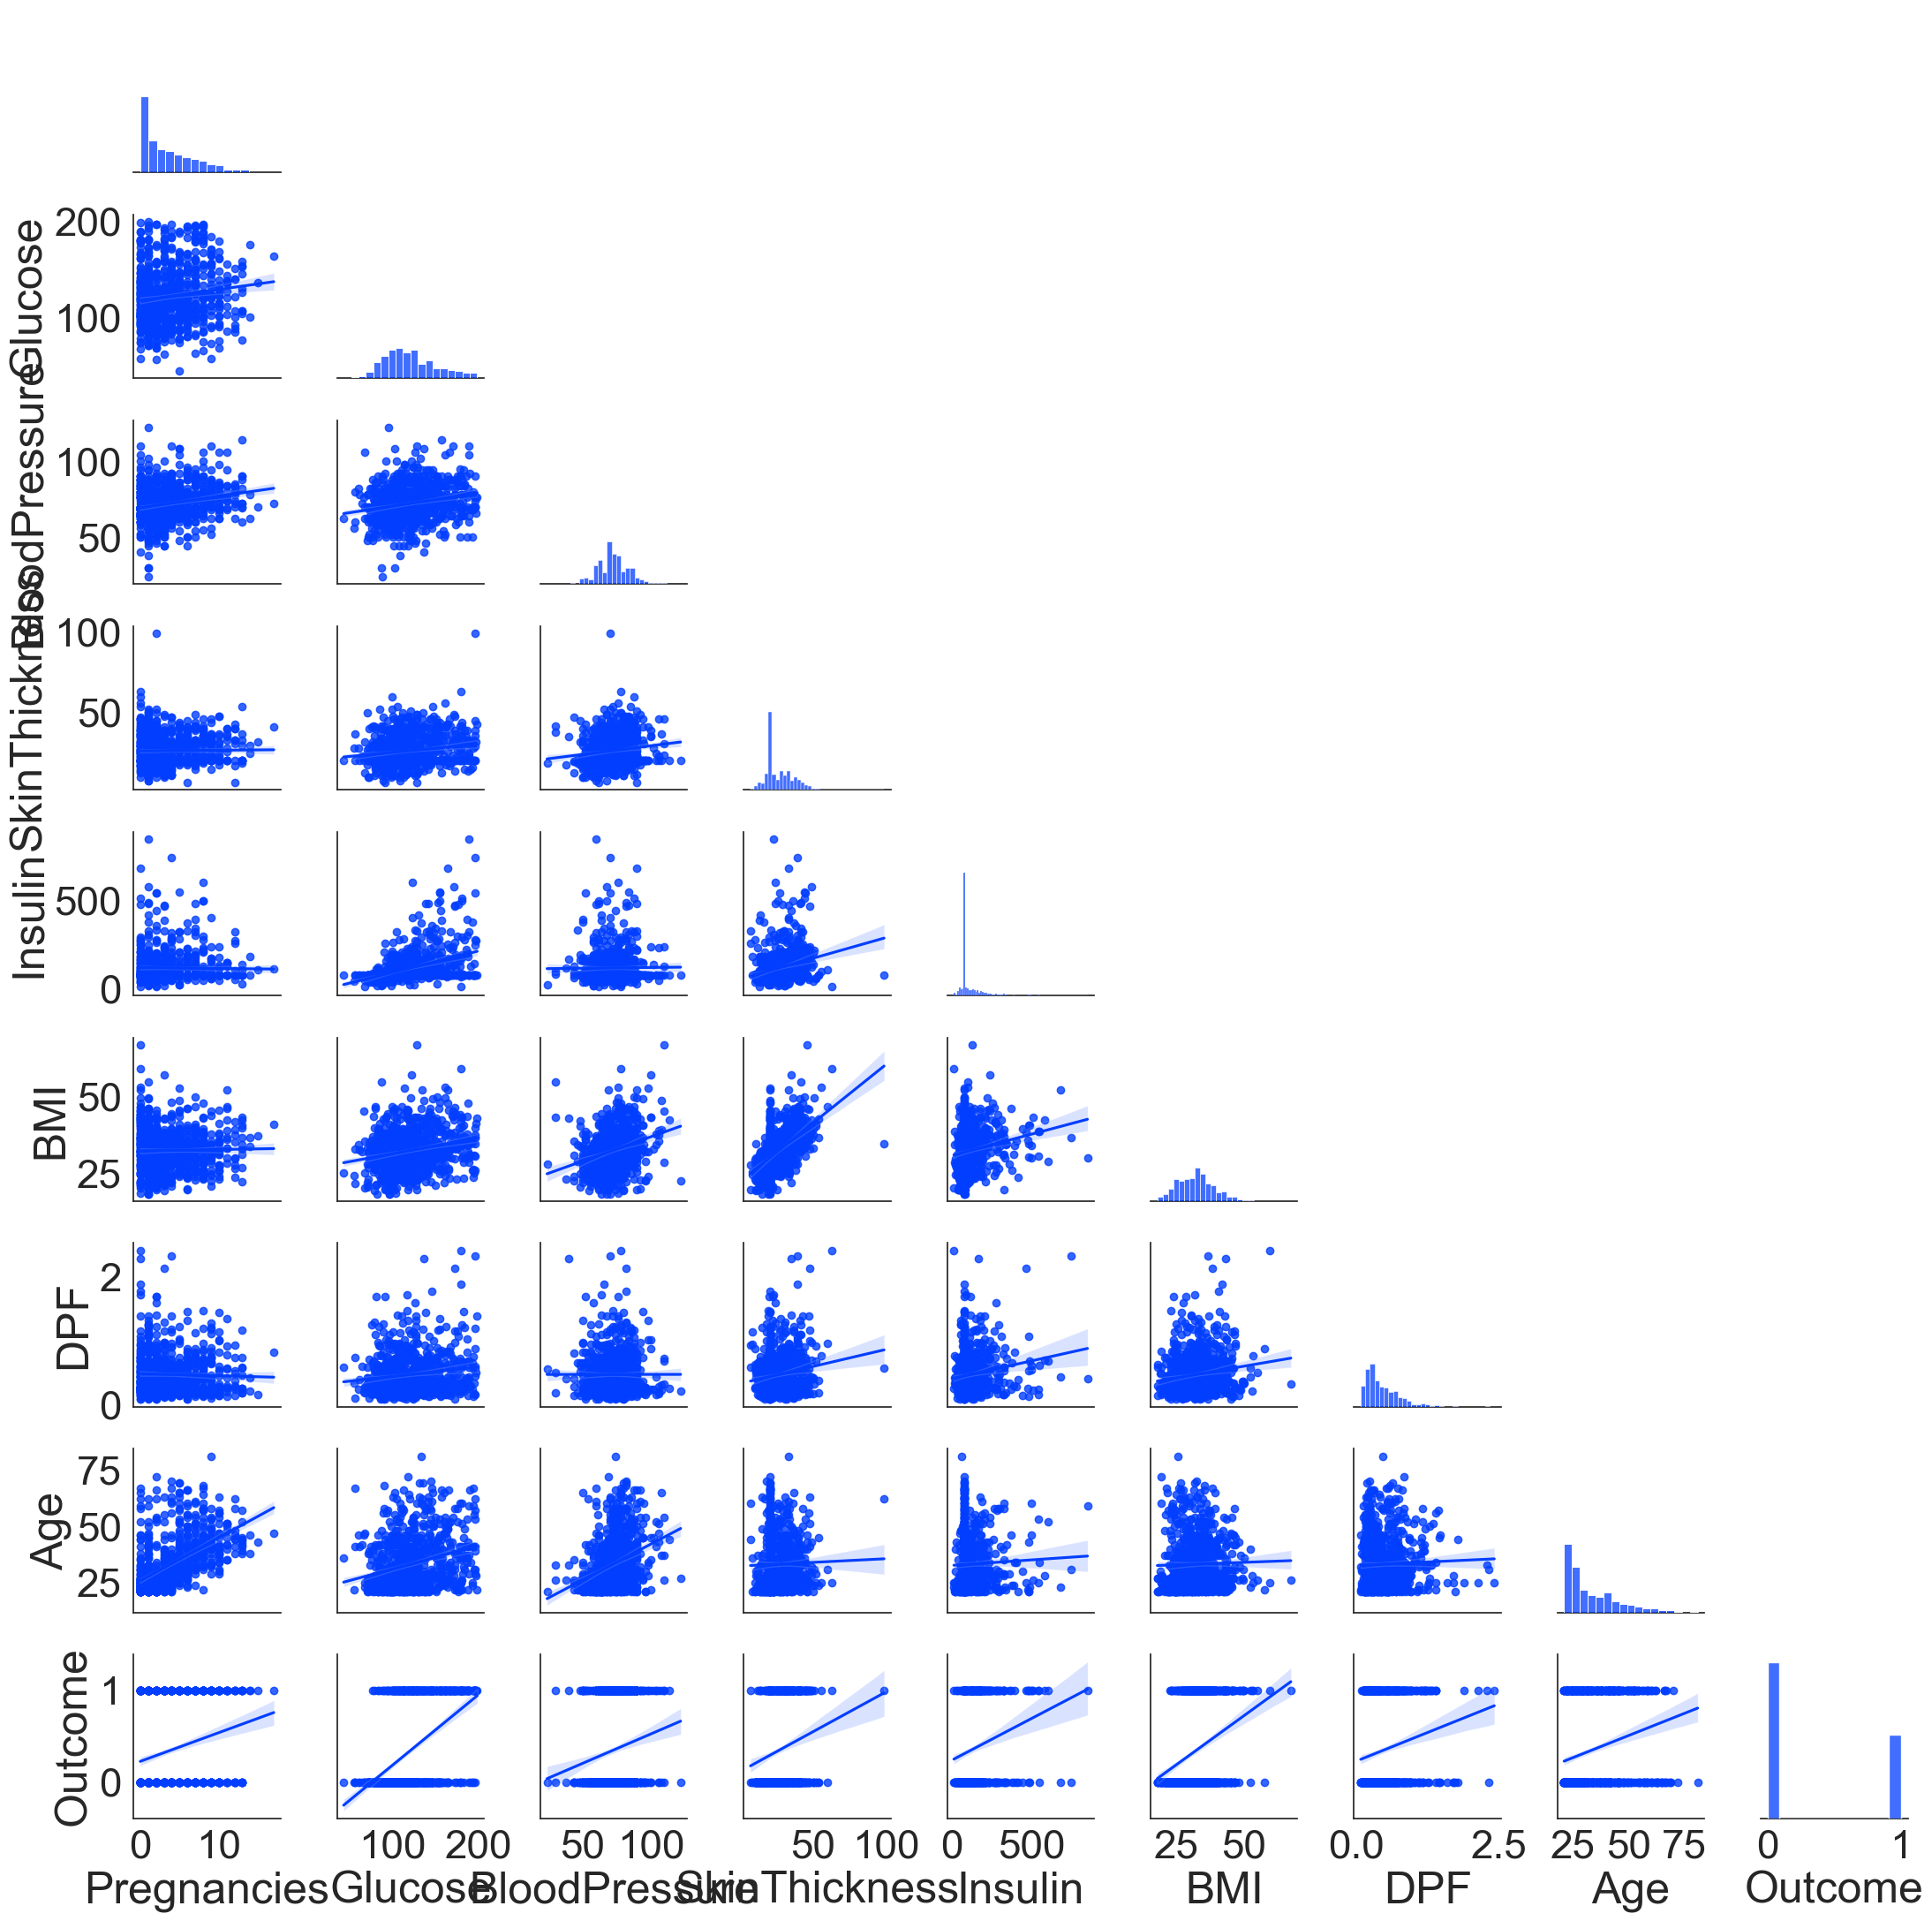

In [66]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=3)
sns.set_style('white')
sns.set_palette('bright')
sns.pairplot(df, kind='reg', corner=True, palette='YlGnBu')
plt.show()

1. Glucose seems to be the most important feature in the training of the model, as it has a high collinearity with Outcome
2. SkinThickness and BMI has a high collinearity, which may be a cause of multicollinearity. It must be checked if there's a problem in the performance results